# Logistic Regression Analysis for Diabetes Prediction
In this project, we will explore the application of logistic regression to predict the likelihood of diabetes in individuals based on various health metrics. By analyzing a dataset of patient information, we aim to identify key factors influencing diabetes risk and build a predictive model that can assist healthcare professionals in early diagnosis and intervention. This brief overview will cover the data preprocessing, model training, evaluation metrics, and insights derived from the analysis.

# Importing all important libraries and dataset.

In [1]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.sample(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
767,1,93,70,31,0,30.4,0.315,23,0
20,3,126,88,41,235,39.3,0.704,27,0
560,6,125,76,0,0,33.8,0.121,54,1
755,1,128,88,39,110,36.5,1.057,37,1
275,2,100,70,52,57,40.5,0.677,25,0
108,3,83,58,31,18,34.3,0.336,25,0
526,1,97,64,19,82,18.2,0.299,21,0


In [5]:
df.columns
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**NOTE:**
It's indeed puzzling to observe instances where certain physiological indicators like blood pressure (BP) and insulin are recorded as zero in a dataset, especially when considering the context of diabetes diagnosis. While it's plausible to encounter occasional zero values due to data entry errors or missing information, it raises questions about the validity and reliability of the data.

In the case where blood pressure is recorded as zero and diabetes outcome is also zero, it may suggest that these entries could be erroneous or incomplete. It's highly improbable for a person to have zero blood pressure and simultaneously not have diabetes, as blood pressure is a fundamental physiological parameter independent of diabetes status. This discrepancy underscores the importance of data quality assurance and thorough examination of outliers and inconsistencies during data preprocessing.

In essence, encountering such discrepancies underscores the need for diligent data cleaning and validation procedures. These anomalies highlight potential data integrity issues that need to be addressed to ensure the reliability and validity of the dataset. In practice, handling such anomalies may involve imputing missing values based on statistical measures or domain knowledge, or in extreme cases, removing or flagging erroneous entries to prevent them from influencing the analysis and model outcomes.

# Exploratory Data Analysis: Feature Selection and Data Imputation

**Target Column and Correlation Coefficient**

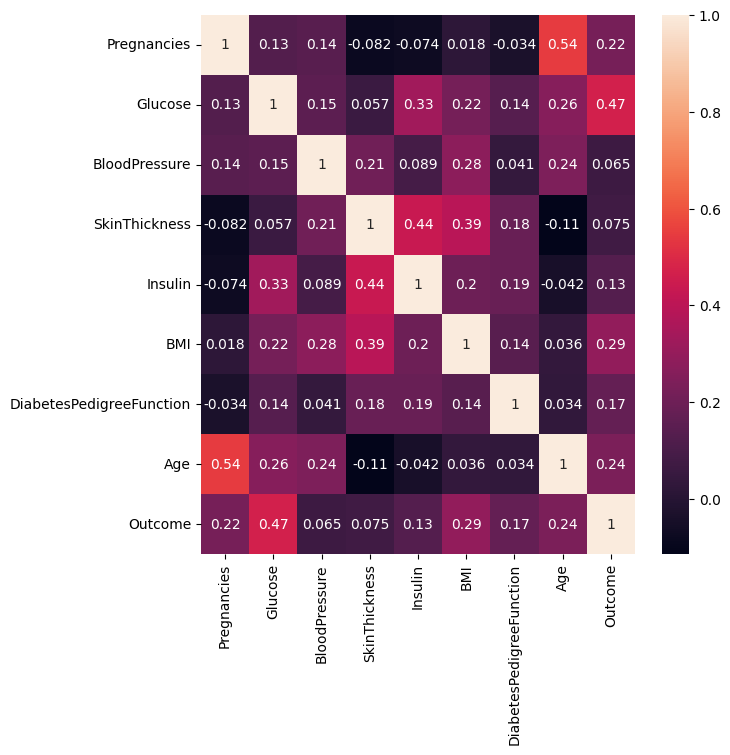

In [9]:
df.corr()
plt.figure(figsize=(7,7))
ax = sns.heatmap(df.corr(), annot=True)
plt.savefig('correlation-coefficient.jpg')
plt.show()

**Descriptive Statistics**
To compute descriptive statistics for numerical features in the dataset.



In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Data Imputation**<br>
To handle missing or zero values in specific features through data imputation. This step visualizes the distribution of certain features using histograms and replaces zero values with appropriate statistics (median or mean) to address data gaps.

<ipython-input-12-9849a8958f05>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Pregnancies)
<ipython-input-12-9849a8958f05>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.BloodPressure)
<ipython-input-12-9849a8958f05>:3: UserWarning: 

`distplot` is a deprecated function and will be re

<Axes: xlabel='Insulin', ylabel='Density'>

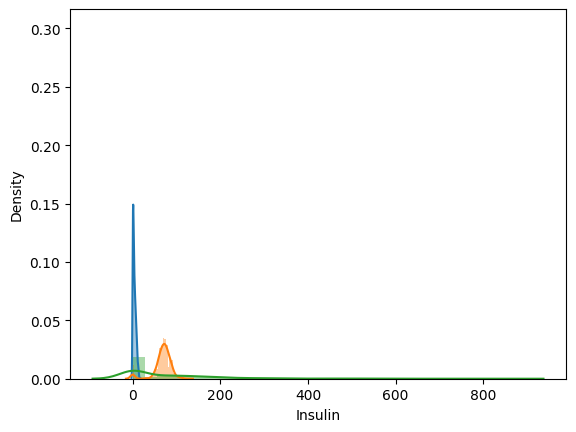

In [12]:
sns.distplot(df.Pregnancies)
sns.distplot(df.BloodPressure)
sns.distplot(df.Insulin)


**Replacing zeros in datset columns iwth respectivbe mean or median to create datset good.**

In [13]:
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['Pregnancies'] = df['Pregnancies'].replace(0, df['Pregnancies'].median())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(0, df['DiabetesPedigreeFunction'].median())
df['Age'] = df['Age'].replace(0, df['Age'].median())


In [15]:
df.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,3,137.0,40.0,35,168.0,43.1,2.288,33,1
5,5,116.0,74.0,23,30.5,25.6,0.201,30,0


In summary, when imputing missing or invalid values in numeric data:


*   If the data distribution is symmetric and there are no significantoutliers, mean imputation can be used.

*  If the data distribution is non-symmetric or contains outliers, median imputation is preferred as it provides a more robust estimate of central tendency.





# Exploratory Data Analysis: Outlier Detection and Normalization

In [16]:
## Splitting the data into input features (X) and target value (y)
X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

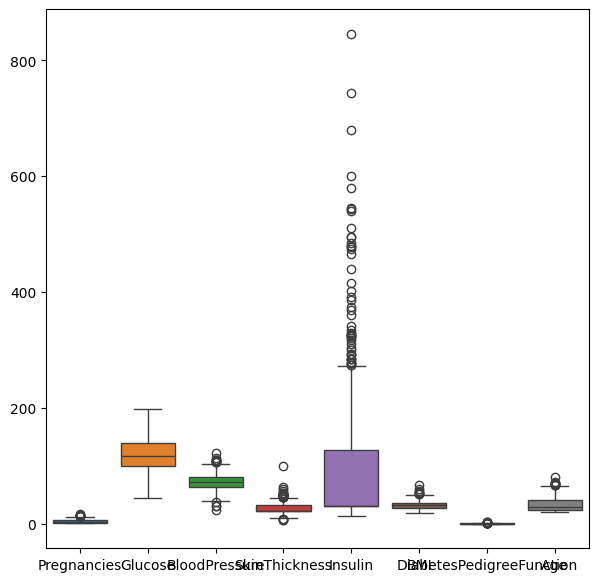

In [17]:
fig, ax = plt.subplots(figsize = (7, 7))
sns.boxplot(data = X, ax=ax)
plt.savefig('boxPlot.jpg')


**Define outlier boundaries using IQR method for each feature**<br>
The outliers are filtered out based on the boundaries defined by the IQR method for each feature.

In [18]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (X[col] >= lower_bound) & (X[col] <= upper_bound)


**Filter dataset to remove outliers **

In [19]:
# Filter dataset to remove outliers
X_outlier_detection = X[mask]
y_outlier_detection = y[mask]


**Standardization** <br>
Standardization transforms numerical features to a standard normal distribution, facilitating comparisons between features. It preserves the relative relationships between data points while removing differences in scale. Standardization is essential for algorithms sensitive to feature scales, such as gradient descent-based optimization algorithms.


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_outlier_detection)


# Splitting the Data into Training and Testing Sets: <br>
**Purpose**: Splitting the dataset into training and testing sets allows us to evaluate the performance of the model on unseen data.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_outlier_detection, test_size=0.33, random_state=42)


In [23]:
print(y_train.value_counts())


Outcome
0    328
1    180
Name: count, dtype: int64


**Example of Oversampling with SMOTE**

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check resampled class distribution
print("\nResampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())



Resampled class distribution:
Outcome
1    328
0    328
Name: count, dtype: int64


**Note :**<br>
In this example, we use SMOTE (Synthetic Minority Over-sampling Technique) to oversample the minority class (positive cases of diabetes) in the training set. The fit_resample method applies the SMOTE algorithm to generate synthetic samples for the minority class, balancing the class distribution. This ensures that our model is trained on a balanced dataset, reducing the risk of bias towards the majority class.

# Model Training: Implementation Of Logisitc Regression

In [25]:
from sklearn.linear_model import LogisticRegression
# Initialize Logistic Regression classifier
logistic_regression_model = LogisticRegression()
# Fit the model to the training data
logistic_regression_model.fit(X_train, y_train)


LogisticRegression()

Model Evaluation:
Purpose: After training the model, we need to evaluate its performance on unseen data (testing set) to assess its effectiveness in making predictions.

Explanation: We'll use the testing dataset (X_test and y_test) to evaluate the logistic regression model's performance. This involves making predictions on the testing set and comparing them to the actual labels to calculate evaluation metrics such as accuracy, precision, recall, and F1-score.

Code: Implement evaluation metrics such as accuracy_score, precision_score, recall_score, and f1_score from Scikit-learn's metrics module to evaluate the model's performance.

Model Interpretation:
Purpose: Understanding the coefficients of the logistic regression model helps interpret the importance of each feature in predicting the target variable.

Explanation: We'll examine the coefficients (weights) assigned to each feature by the logistic regression model. Positive coefficients indicate features that positively contribute to the likelihood of diabetes, while negative coefficients indicate features that negatively contribute.

Code: Access the coefficients using the coef_ attribute of the trained logistic regression model.

Model Optimization:
Purpose: Fine-tuning the logistic regression model's hyperparameters can improve its performance and generalization ability.

Explanation: We can optimize hyperparameters such as regularization strength (C), penalty (l1 or l2), solver algorithm, and class weight balancing to improve the model's performance. Techniques like cross-validation and grid search can be used for hyperparameter tuning.

Code: Implement hyperparameter tuning using techniques such as GridSearchCV from Scikit-learn's model_selection module to find the optimal combination of hyperparameters for the logistic regression model.

By following these steps, we can effectively train, evaluate, interpret, and optimize the logistic regression model for predicting instances of diabetes based on the input features. This process enables us to develop a reliable and accurate predictive model for diabetes diagnosis.

# Model Prediction and Evaluation



In [27]:
y_predictions = logistic_regression_model.predict(X_test)
print(y_predictions)

[0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0
 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


**Model Evalution**

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predictions)

from sklearn.metrics import classification_report
target_names = ['Non-Diabetic', 'Diabetic']
print(classification_report(y_test, y_predictions, target_names=target_names))


              precision    recall  f1-score   support

Non-Diabetic       0.78      0.88      0.83       165
    Diabetic       0.70      0.52      0.60        86

    accuracy                           0.76       251
   macro avg       0.74      0.70      0.71       251
weighted avg       0.75      0.76      0.75       251



# Save the Project: Predictive Analysis in Diabetes

In [29]:
import pickle

In [30]:
import pickle
pickle.dump(logistic_regression_model, open("diabetic_pred.pkl", "wb"))


**Calling out model an checking on test data**

In [31]:
classification_model = pickle.load(open("diabetic_pred.pkl", "rb"))


In [32]:
classification_model.predict(X_test)


array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

# <center><b>Thanks..</b></center>